In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mental-health-in-tech-survey/survey.csv


 # About Dataset
 
Dataset Information
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. You are also encouraged to analyze data from the ongoing 2016 survey found here.

Content
This dataset contains the following data:

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;"> Mental health in Tech (EDA) </h1>

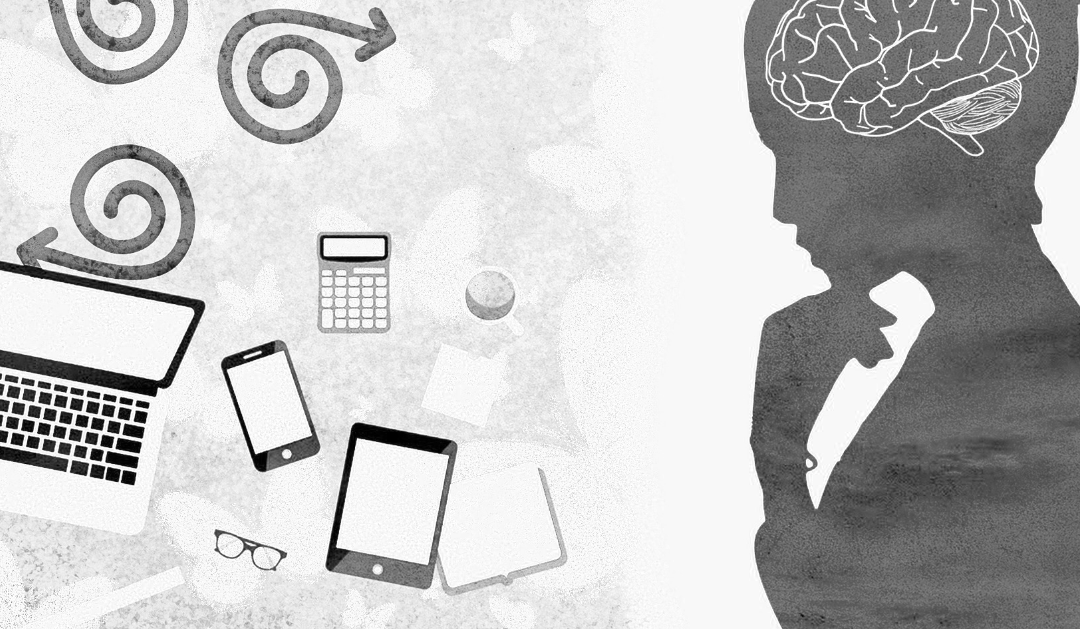

#### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=100
sns.set(style="darkgrid")

In [3]:
df=pd.read_csv("/kaggle/input/mental-health-in-tech-survey/survey.csv")
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


## Workflow
- Understanding of data
- Data cleaning
- Exploratory Data Analysis
- Insights

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;"> Understanding of data </h1>

In [4]:
df.shape

(1259, 27)

In [5]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [7]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

#### Timestamp is in object 

In [8]:
df.isnull().sum().sort_values(ascending=False)

comments                     1095
state                         515
work_interfere                264
self_employed                  18
seek_help                       0
obs_consequence                 0
mental_vs_physical              0
phys_health_interview           0
mental_health_interview         0
supervisor                      0
coworkers                       0
phys_health_consequence         0
mental_health_consequence       0
leave                           0
anonymity                       0
Timestamp                       0
wellness_program                0
Age                             0
benefits                        0
tech_company                    0
remote_work                     0
no_employees                    0
treatment                       0
family_history                  0
Country                         0
Gender                          0
care_options                    0
dtype: int64

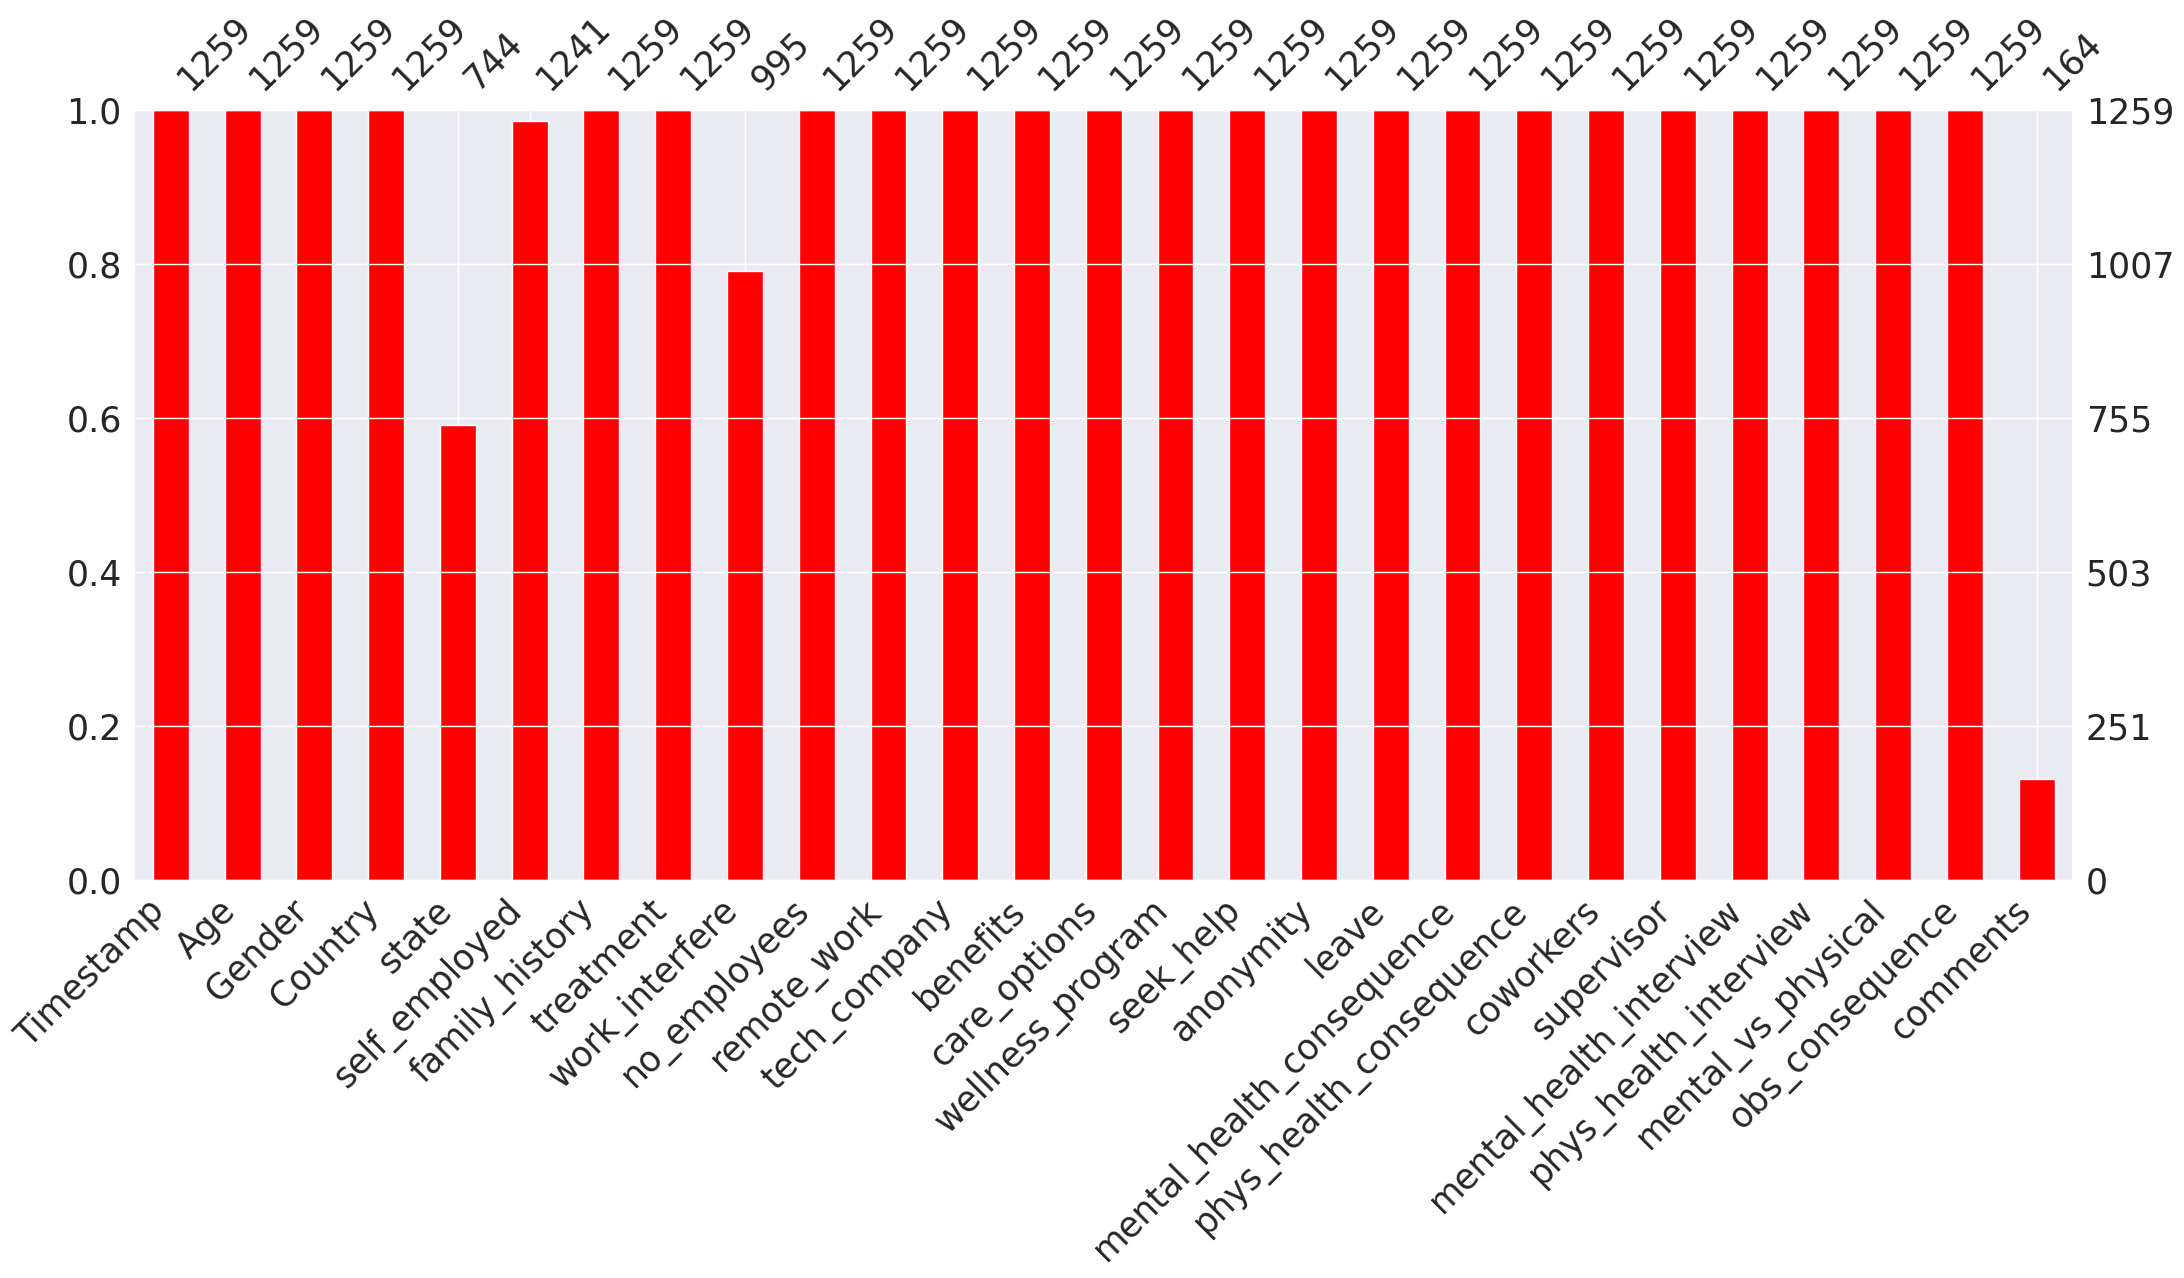

In [9]:
## Checking missing values in visualization
import missingno as msno
msno.bar(df,fontsize=25,color='red');

In [10]:
## Checking percentage of missing values
for i in df.columns:
    if df[i].isnull().any():
         print(i,"------",df[i].isnull().sum()*100/df.shape[0],"%")

state ------ 40.9054805401112 %
self_employed ------ 1.4297061159650517 %
work_interfere ------ 20.96902303415409 %
comments ------ 86.97378872120731 %


In [11]:
for i in df.columns:
    print(i,"----------",df[i].unique(),"--------",df[i].nunique())

Timestamp ---------- ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31'] -------- 1246
Age ---------- [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72] -------- 53
Gender ---------- ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman'

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1259.0,7.942815e+07,2.818299e+09,-1726.0,27.0,31.0,36.0,1.000000e+11


<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;"> Data Cleaning </h1>

In [13]:
df.sample()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
538,2014-08-27 17:52:31,27,Male,United Kingdom,NaN,No,No,No,Never,6-25,No,Yes,Don't know,No,No,No,Don't know,Don't know,Maybe,Maybe,Some of them,Some of them,No,No,Don't know,No,NaN


In [14]:
# droping the columns comments as it has 86% missing values
df.drop(columns=["comments"],inplace=True)

In [15]:
# Changing the timestamp column data type 
import datetime as dt
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
df["month"]=df["Timestamp"].dt.month_name()
df["day"]=df["Timestamp"].dt.day_name()
df["dayoftheweek"]=df["Timestamp"].dt.weekday
df["year"]=df["Timestamp"].dt.year
df.sample()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,day,dayoftheweek,year
1184,2014-10-09 11:14:59,28,F,United States,VA,No,No,Yes,Often,6-25,No,Yes,No,Yes,No,No,Don't know,Very difficult,Yes,Maybe,Some of them,Some of them,No,No,Don't know,No,October,Thursday,3,2014


In [16]:
df["hour"]=df["Timestamp"].dt.hour

In [17]:
df.sample()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,day,dayoftheweek,year,hour
680,2014-08-28 08:43:57,33,male,Bulgaria,NaN,No,No,Yes,Rarely,26-100,Yes,Yes,No,No,No,No,Don't know,Somewhat easy,Maybe,No,Some of them,Some of them,No,Maybe,Don't know,Yes,August,Thursday,3,2014,8


In [18]:
## Filling states where null values
df["state"].fillna("Others",inplace=True)

In [19]:
df["self_employed"].fillna(df["self_employed"].mode()[0],inplace=True)

In [20]:
df["work_interfere"].fillna(df["work_interfere"].mode()[0],inplace=True)

In [21]:
# Checking null values now
df.isnull().sum()

Timestamp                    0
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
month                        0
day                          0
dayoftheweek                 0
year                         0
hour                         0
dtype: int64

In [22]:
## checking where age is negative or wrong 
df["Age"].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [23]:
df.loc[(df['Age'] < 0) | (df['Age'] > 100)| (df['Age'] < 15)]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,day,dayoftheweek,year,hour
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,Sometimes,More than 1000,Yes,No,Yes,No,Don't know,Yes,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,August,Wednesday,2,2014,12
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,Yes,Yes,Yes,Yes,No,No,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No,August,Wednesday,2,2014,15
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,Others,Yes,Yes,Yes,Often,1-5,No,Yes,No,Yes,No,No,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,August,Wednesday,2,2014,15
715,2014-08-28 10:07:53,-1726,male,United Kingdom,Others,No,No,Yes,Sometimes,26-100,No,No,No,No,No,No,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,August,Thursday,3,2014,10
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,Sometimes,100-500,No,Yes,Don't know,Not sure,No,No,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,August,Thursday,3,2014,10
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,August,Friday,4,2014,9
1090,2014-08-29 17:26:15,11,male,United States,OH,Yes,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,August,Friday,4,2014,17
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,August,Saturday,5,2014,20


In [24]:
df["Age"].median()

31.0

In [25]:
df["Age"].iloc[143]=29

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [26]:
l=[364,390,715,1127,734,989,1090]
for i in l:
    df["Age"].iloc[i]=df["Age"].median()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [27]:
df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

In [28]:
df["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [29]:
df["Gender"]=df["Gender"].replace("f","female")
df["Gender"]=df["Gender"].replace("m","male")
df["Gender"]=df["Gender"].replace("Female","female")
df["Gender"]=df["Gender"].replace("Male","male")
df["Gender"]=df["Gender"].replace("F","female")
df["Gender"]=df["Gender"].replace("M","male")
df["Gender"]=df["Gender"].replace("maile","male")
df["Gender"]=df["Gender"].replace("Male-ish","male")
df["Gender"]=df["Gender"].replace("women","female")
df["Gender"]=df["Gender"].replace("Women","female")
df["Gender"]=df["Gender"].replace("women","female")
df["Gender"]=df["Gender"].replace("Mail","male")
df["Gender"]=df["Gender"].replace("Man","male")
df["Gender"]=df["Gender"].replace("Make","male")
df["Gender"]=df["Gender"].replace("Cis Female","female")
df["Gender"]=df["Gender"].replace("Cis Male","male")
df["Gender"]=df["Gender"].replace("Male (CIS)","male")
df["Gender"]=df["Gender"].replace("Female (cis)","female")
df["Gender"]=df["Gender"].replace("Mal","male")
df["Gender"]=df["Gender"].replace("Femake","female")
df["Gender"]=df["Gender"].replace("woman","female")
df["Gender"]=df["Gender"].replace("cis male","male")
df["Gender"]=df["Gender"].replace("Cis Man","male")
df["Gender"]=df["Gender"].replace("femail","female")
df["Gender"]=df["Gender"].replace("Female ","female")
df["Gender"]=df["Gender"].replace("Male ","male")
df["Gender"]=df["Gender"].replace("msle","male")
df["Gender"]=df["Gender"].replace("Malr","male")
df["Gender"]=df["Gender"].replace("Woman","female")


In [30]:
df['Gender'] = np.where((df['Gender'] != 'female') & (df['Gender'] != 'male'), 'Other', df['Gender'])


In [31]:
df["Gender"].unique()

array(['female', 'male', 'Other'], dtype=object)

#### Separated Males and Female and other in gender 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age', ylabel='Density'>

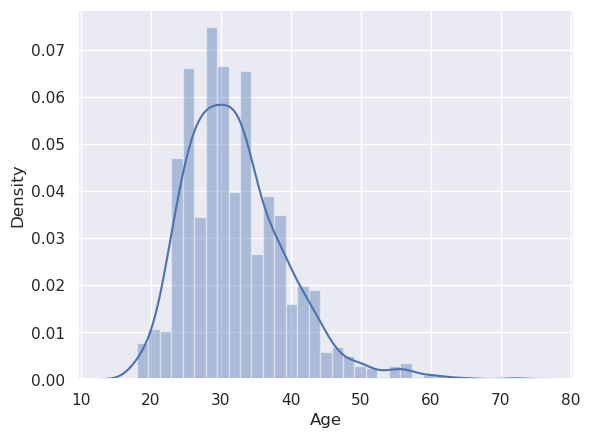

In [32]:
sns.distplot(df["Age"])

In [33]:
df["Age_category"] = pd.cut(df.Age, [18,25,50, np.inf], labels=['youth','adults',"senior_citizens"])

#### Added new column of age category where 18 to 25 were youth, 25 to 50 were adults and above are senior citizens

<AxesSubplot:>

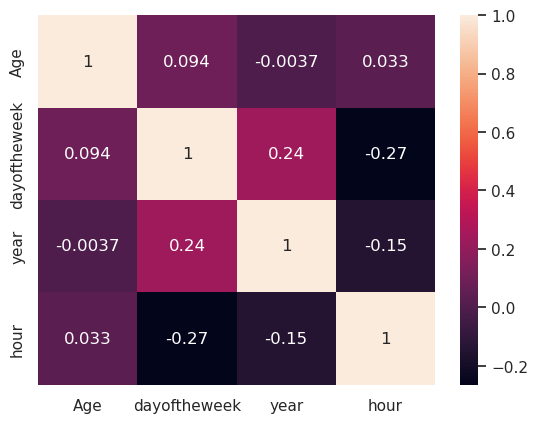

In [34]:
sns.heatmap(df.corr(),annot=True)

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;"> Exploratory data analysis with Insights</h1>

In [35]:
df.sample()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,day,dayoftheweek,year,hour,Age_category
1171,2014-09-11 17:00:30,30,male,United States,IL,No,No,No,Sometimes,More than 1000,No,No,Yes,No,Yes,Yes,Don't know,Don't know,Yes,Maybe,No,No,No,No,Don't know,No,September,Thursday,3,2014,17,adults


male      991
female    246
Other      22
Name: Gender, dtype: int64


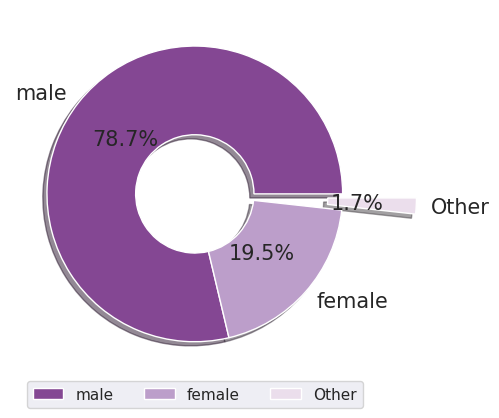

In [36]:
## Which gender was most effected
g=df["Gender"].value_counts()
print(g)
color=sns.color_palette(palette='PRGn')
plt.pie(g,labels=g.index,autopct="%0.01f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},shadow=True,colors=color,explode=[0,0,0.5]);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3);

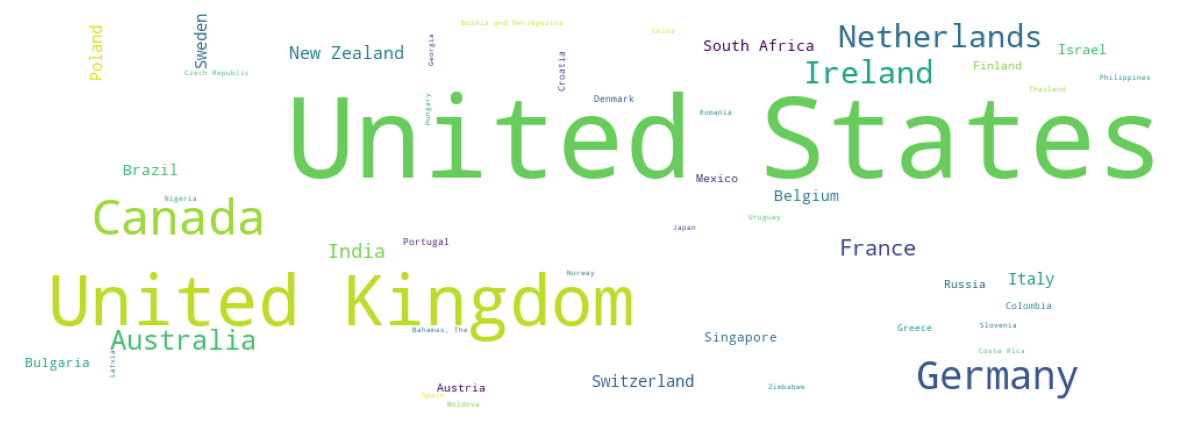

In [37]:
from wordcloud import WordCloud as word
d=df["Country"].value_counts()
wc = word(background_color='white', width=1000, height=350)
wc.generate_from_frequencies(d)
plt.figure(figsize=(15,15),dpi=100)
plt.imshow(wc)
plt.axis('off')
plt.show()

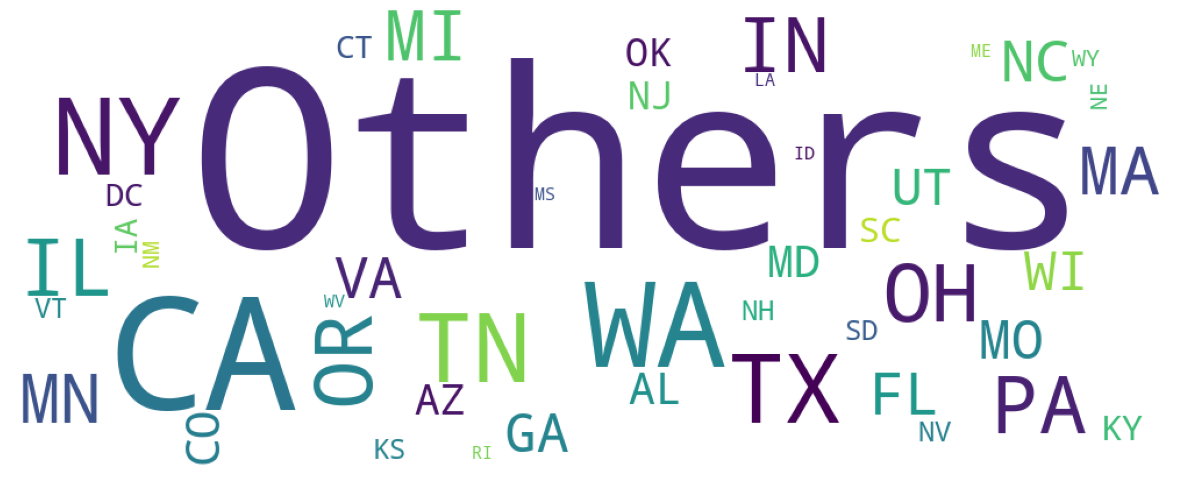

In [38]:
from wordcloud import WordCloud as word
d=df["state"].value_counts()
wc = word(background_color='white', width=1000, height=400)
wc.generate_from_frequencies(d)
plt.figure(figsize=(15,15),dpi=100)
plt.imshow(wc)
plt.axis('off')
plt.show()

No     1113
Yes     146
Name: self_employed, dtype: int64


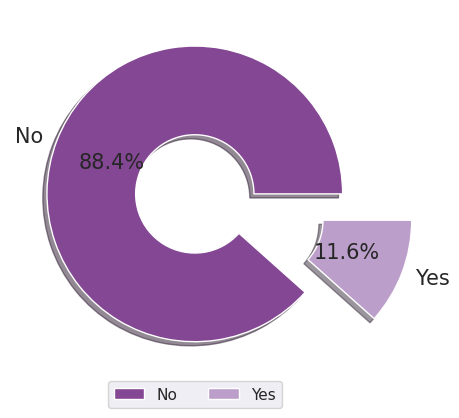

In [39]:
# How many employees were self employed 
s=df["self_employed"].value_counts()
print(s)
color=sns.color_palette(palette='PRGn')
plt.pie(s,labels=s.index,autopct="%0.01f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},shadow=True,colors=color,explode=[0,0.50]);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3);

> #### Mostly Employee were working in offices and only **11% were self employed**

No     767
Yes    492
Name: family_history, dtype: int64


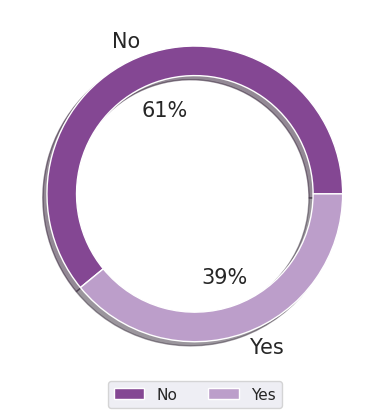

In [40]:
# how many employee have a family history of mental illness
f=df["family_history"].value_counts()
print(f)
color=sns.color_palette(palette='PRGn')
plt.pie(f,labels=f.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={'width': 0.20},shadow=True,colors=color,explode=[0,0]);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3);

>  #### **61% Employee** have no family history of mental illness before 

Yes    637
No     622
Name: treatment, dtype: int64


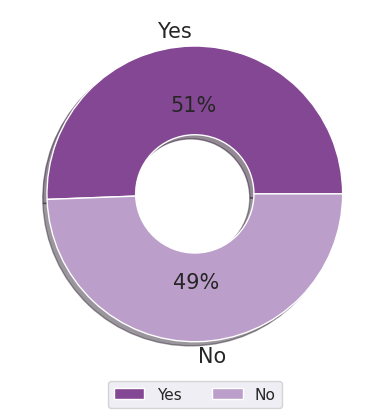

In [41]:
## How many employee were undergoing any treatment for mental illness
m=df["treatment"].value_counts()
print(m)
color=sns.color_palette(palette='PRGn')
plt.pie(m,labels=m.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},shadow=True,colors=color,explode=[0,0]);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3);

> #### **51% of the employee**  were undergoing treatment for mental illness which is a huge number

Sometimes    729
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64


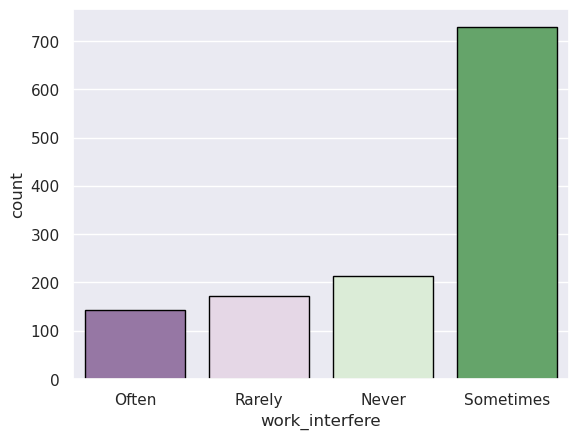

In [42]:
# If employee have a mental health condition, do they feel that it interferes with their work
print(df["work_interfere"].value_counts())
sns.countplot(x="work_interfere",data=df,edgecolor="black",palette='PRGn');

> #### **Over 700+ employee** says in their mental health condition,they feel that it interferes with their work

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64


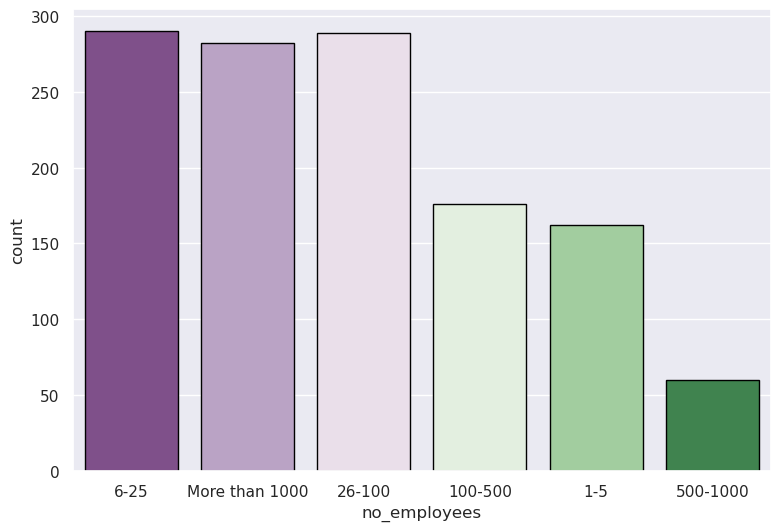

In [43]:
## What were the strength of the companies employees working in 
print(df["no_employees"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="no_employees",data=df,edgecolor="black",palette='PRGn');

> #### Mostly Employee 280+ were from **6 to 25, 26 to 100, more than 1000 employee firm**

No     883
Yes    376
Name: remote_work, dtype: int64


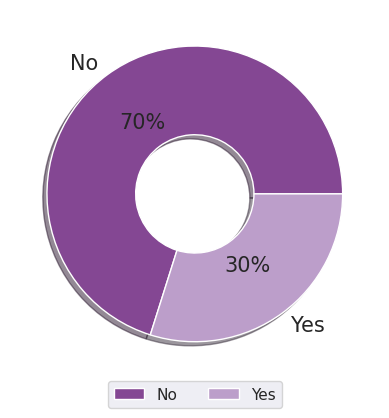

In [44]:
## How many employee work remotely (outside of an office) or at least 50% of the time?
t=df["remote_work"].value_counts()
print(t)
color=sns.color_palette(palette='PRGn')
plt.pie(t,labels=t.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},shadow=True,colors=color,explode=[0,0]);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3);

> #### Mostly Employee **dont work** remotely 

Yes    1031
No      228
Name: tech_company, dtype: int64


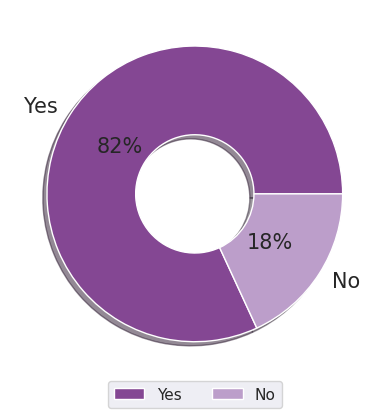

In [45]:
## How many employee were from the tech company 
tech=df["tech_company"].value_counts()
print(tech)
color=sns.color_palette(palette='PRGn')
plt.pie(tech,labels=tech.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},shadow=True,colors=color,explode=[0,0]);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3);

> #### **1000+** Employees were from the **Tech Company**

Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64


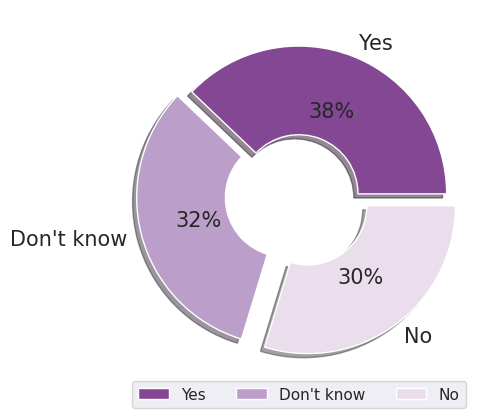

In [46]:
## Any employee who gets mental health benefits
b=df["benefits"].value_counts()
print(b)
color=sns.color_palette(palette='PRGn')
plt.pie(b,labels=b.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},shadow=True,colors=color,explode=[0,0.1,0.1]);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3);

> #### **450+ Employee** Get mental health benefits were as **400+** don't know about it and **350+** didn't get any benefits

No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64


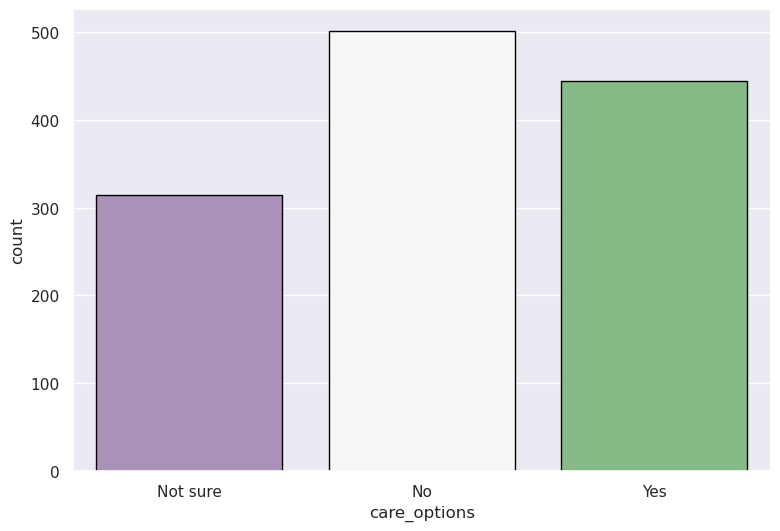

In [47]:
# How many employee know the options for mental health care their employer provides?
print(df["care_options"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="care_options",data=df,edgecolor="black",palette='PRGn');

> #### **500+ employee** don't know about any care options being provided by their employer where as **400+ employee** knows about that 

No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64


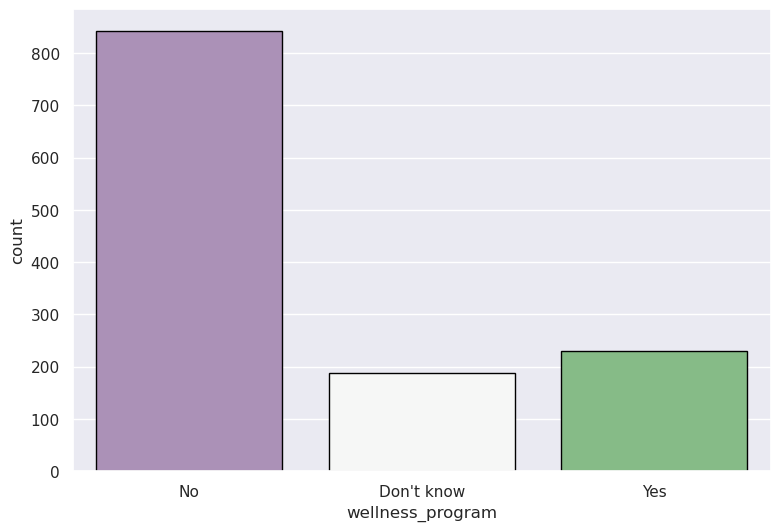

In [48]:
## Are they any mental health program being held in their companies
print(df["wellness_program"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="wellness_program",data=df,edgecolor="black",palette='PRGn');

> #### Mostly companies **don't do** any mental health program or discuss about it with their employees

No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64


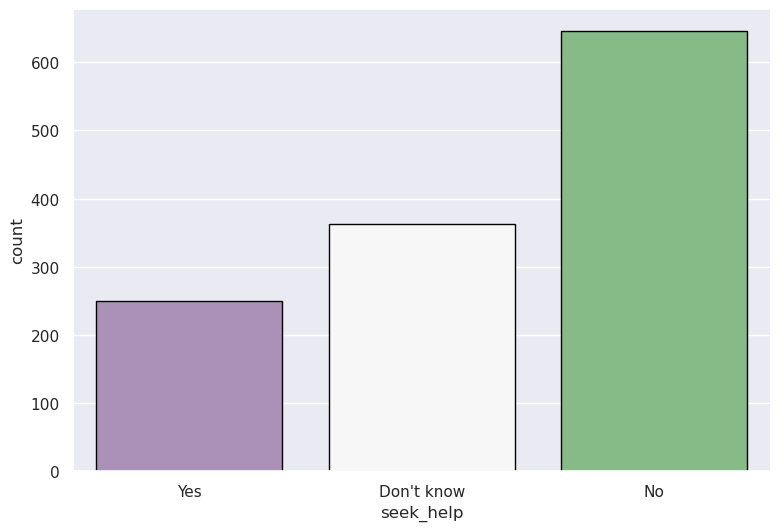

In [49]:
# Does any employer provide resources to learn more about mental health issues and how to seek help
print(df["seek_help"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="seek_help",data=df,edgecolor="black",palette='PRGn');

> #### Mostly companies **don't provide** any resources to learn more about mental health issues and how to seek help

Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64


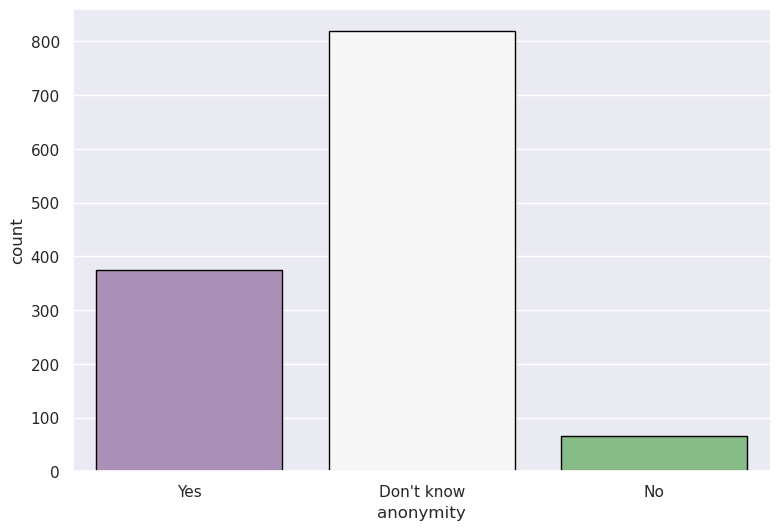

In [50]:
# DO their anonymity protected if they choose to take advantage of mental health or substance abuse treatment
print(df["anonymity"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="anonymity",data=df,edgecolor="black",palette='PRGn');

> #### Mostly Employee **don't Know**  if their anonymity protected wnhe they choose to take advantage of mental health or substance abuse treatment

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64


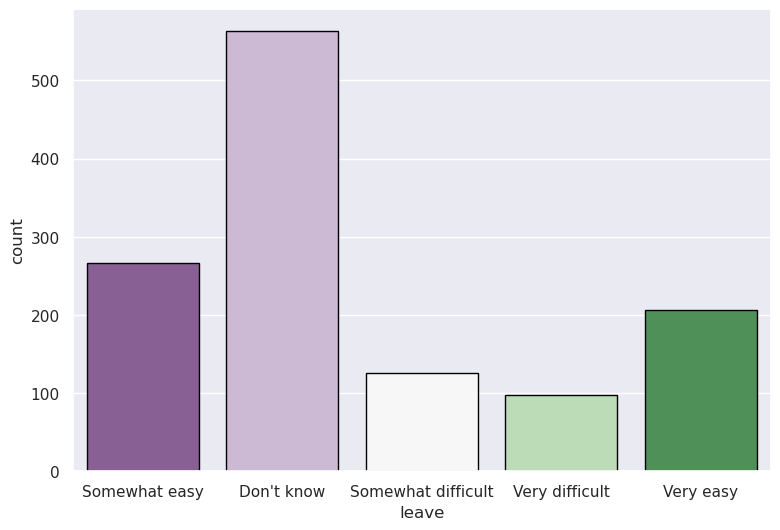

In [51]:
# How easy is it to take medical leave for a mental health condition
print(df["leave"].value_counts())
plt.figure(figsize=(9,6))
sns.countplot(x="leave",data=df,edgecolor="black",palette='PRGn');


> #### Mostly Employee **don't Know** if it is easy to take medical leave for a mental health condition

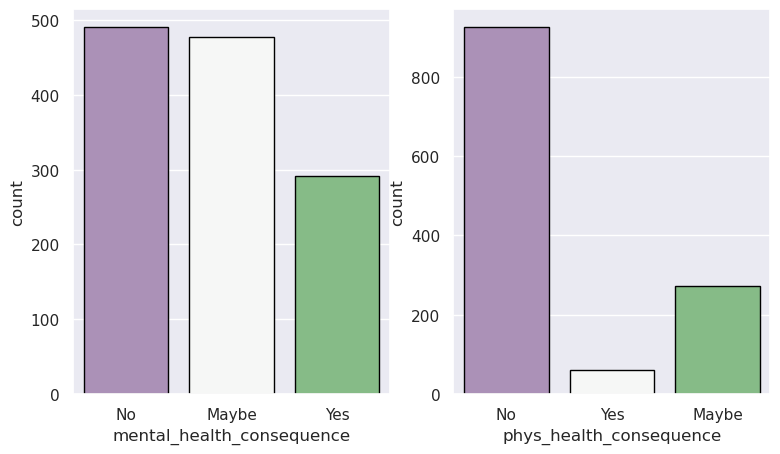

In [52]:
# Do they think that discussing a mental health or physical health consequence issue with their employer would have negative consequences?
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
sns.countplot(x="mental_health_consequence",data=df,edgecolor="black",palette='PRGn');

plt.subplot(1,2,2)
sns.countplot(x="phys_health_consequence",data=df,edgecolor="black",palette='PRGn');


> #### Moslty Employee **Don't think** that discussing a mental health or physical health issue with their employer would have negative consequences

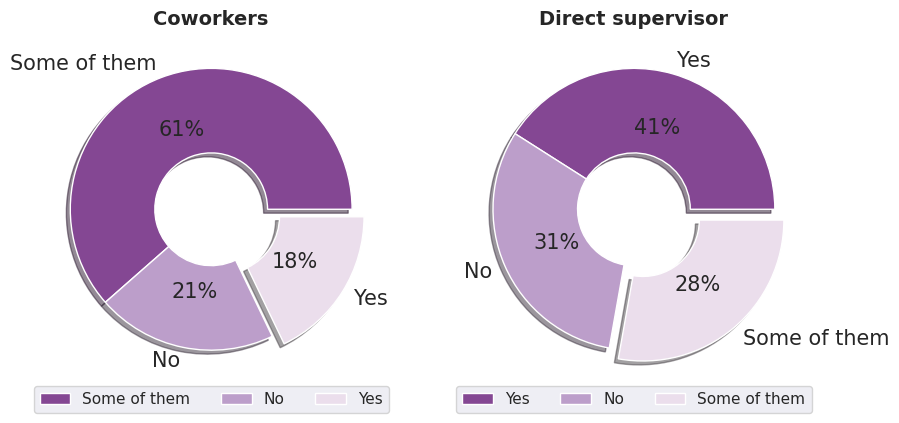

In [53]:
# How many employee would be willing to discuss a mental health issue with their coworkers or direct supervisor
co=df["coworkers"].value_counts()

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
color=sns.color_palette(palette='PRGn')
plt.pie(co,labels=co.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},shadow=True,colors=color,explode=[0,0,0.1]);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3);
plt.title("Coworkers",fontsize=14, fontweight='bold');


s=df["supervisor"].value_counts()
plt.subplot(1,2,2)
color=sns.color_palette(palette='PRGn')
plt.pie(s,labels=s.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},shadow=True,colors=color,explode=[0,0,0.1]);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3)
plt.title("Direct supervisor",fontsize=14, fontweight='bold');


> #### Only **Some of the Employee** would be willing to discuss a mental health issue with their **coworkers** were as **41% employee** discuss a mental health issue with **direct supervisor**

In [54]:
df.sample()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,day,dayoftheweek,year,hour,Age_category
21,2014-08-27 11:35:24,31,male,United States,NC,Yes,No,No,Never,1-5,Yes,Yes,No,No,No,No,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No,August,Wednesday,2,2014,11,adults


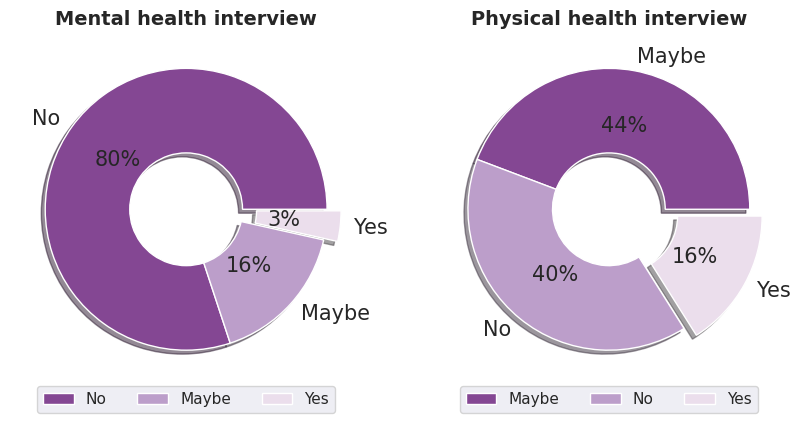

In [55]:
# Would employee bring up a mental health or physical health issue with a potential employer in an interview
me=df["mental_health_interview"].value_counts()

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
color=sns.color_palette(palette='PRGn')
plt.pie(me,labels=me.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},shadow=True,colors=color,explode=[0,0,0.1]);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3)
plt.title("Mental health interview",fontsize=14, fontweight='bold');

py=df["phys_health_interview"].value_counts()
plt.subplot(1,2,2)
color=sns.color_palette(palette='PRGn')
plt.pie(py,labels=py.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},shadow=True,colors=color,explode=[0,0,0.1]);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3);
plt.title("Physical health interview",fontsize=14, fontweight='bold');


> #### Mostly employee **Don't disclose** their mental health issues in their interview and **maybe they disclose** their physical health issues

Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64


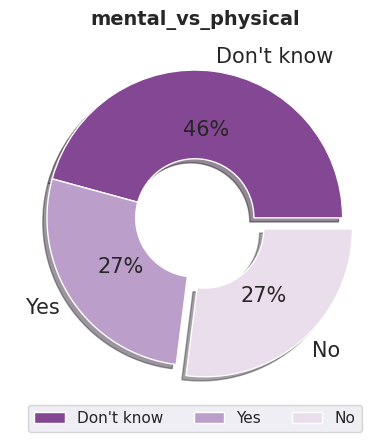

In [56]:
# Do Employee feel that your employer takes mental health as seriously as physical health?
mp=df["mental_vs_physical"].value_counts()
print(mp)
color=sns.color_palette(palette='PRGn')
plt.pie(mp,labels=mp.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},shadow=True,colors=color,explode=[0,0,0.1]);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3);
plt.title("mental_vs_physical",fontsize=14, fontweight='bold');

No     1075
Yes     184
Name: obs_consequence, dtype: int64


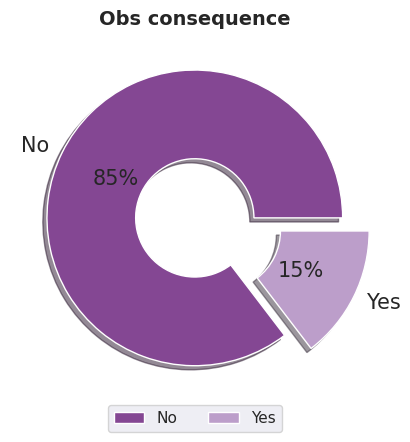

In [57]:
#Have they heard of or observed negative consequences for coworkers with mental health conditions in them
obs=df["obs_consequence"].value_counts()
print(obs)
color=sns.color_palette(palette='PRGn')
plt.pie(obs,labels=obs.index,autopct="%0.0f%%",textprops={"fontsize":15},wedgeprops={'width': 0.6},shadow=True,colors=color,explode=[0,0.2]);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1),ncol=3);
plt.title("Obs consequence",fontsize=14, fontweight='bold');

In [58]:
df.sample()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,day,dayoftheweek,year,hour,Age_category
438,2014-08-27 15:43:17,23,female,United States,MA,No,No,Yes,Sometimes,26-100,No,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,August,Wednesday,2,2014,15,youth


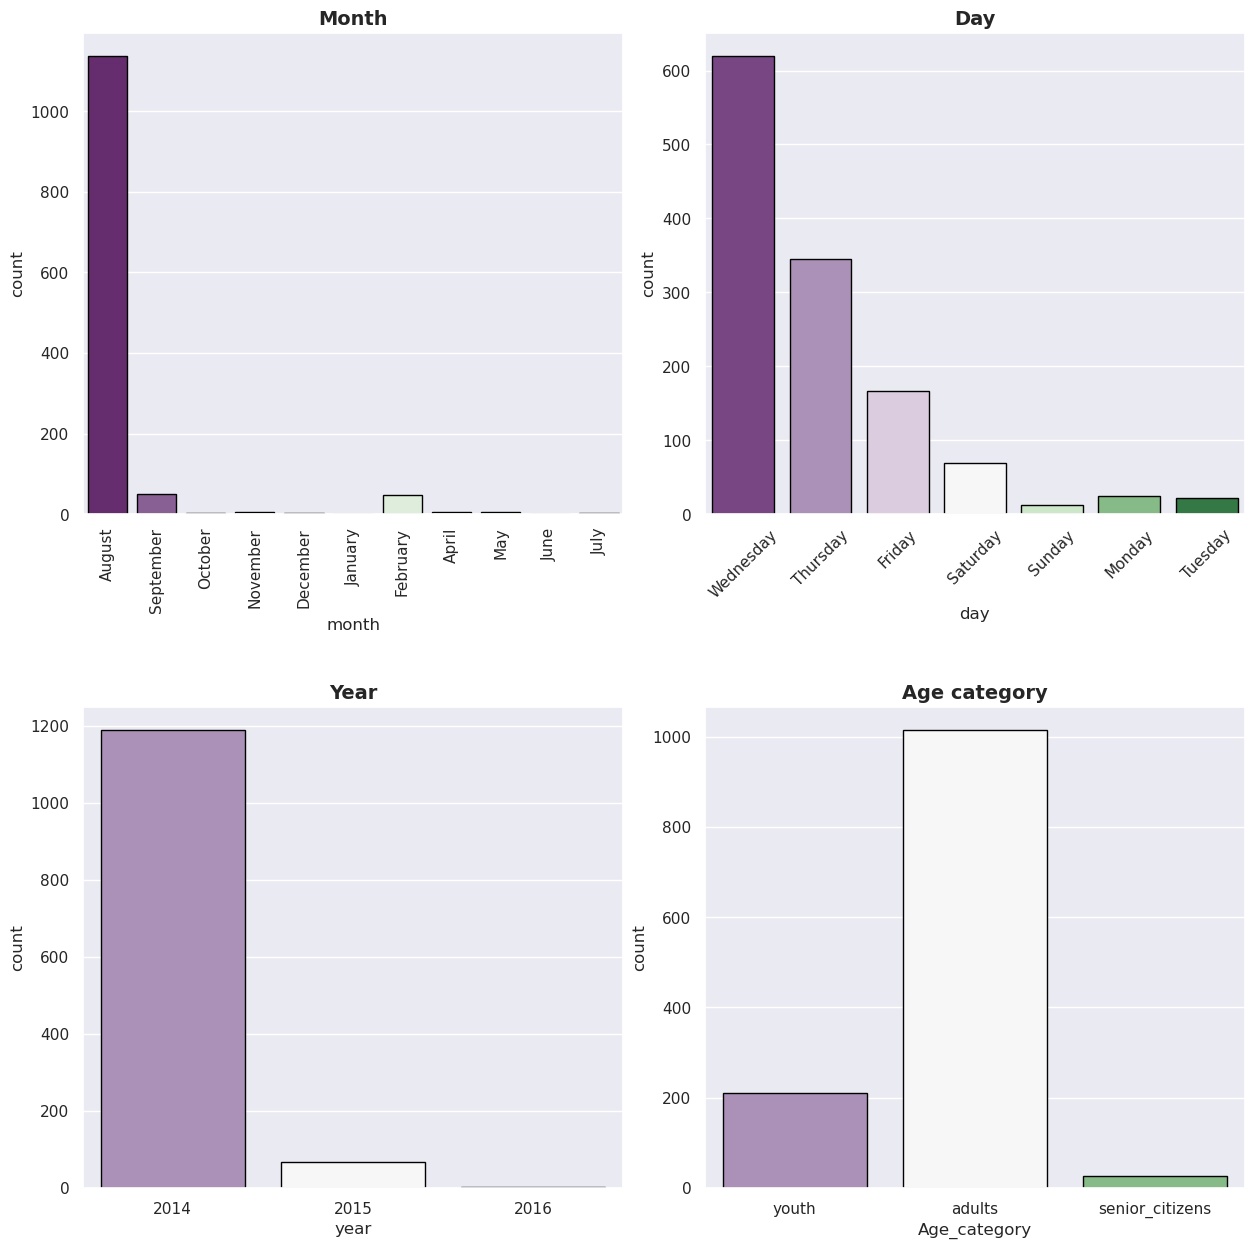

In [59]:
## In which month mostly employee filled with applications
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(x="month",data=df,edgecolor="black",palette='PRGn')
plt.xticks(rotation=90)
plt.title("Month",fontsize=14, fontweight='bold');
plt.subplots_adjust(wspace=0.15,hspace=0.4);

plt.subplot(2,2,2)
sns.countplot(x="day",data=df,edgecolor="black",palette='PRGn')
plt.xticks(rotation=45)
plt.title("Day",fontsize=14, fontweight='bold');

plt.subplot(2,2,3)
sns.countplot(x="year",data=df,edgecolor="black",palette='PRGn')
plt.title("Year",fontsize=14, fontweight='bold');

plt.subplot(2,2,4)
sns.countplot(x="Age_category",data=df,edgecolor="black",palette='PRGn')
plt.title("Age category",fontsize=14, fontweight='bold');




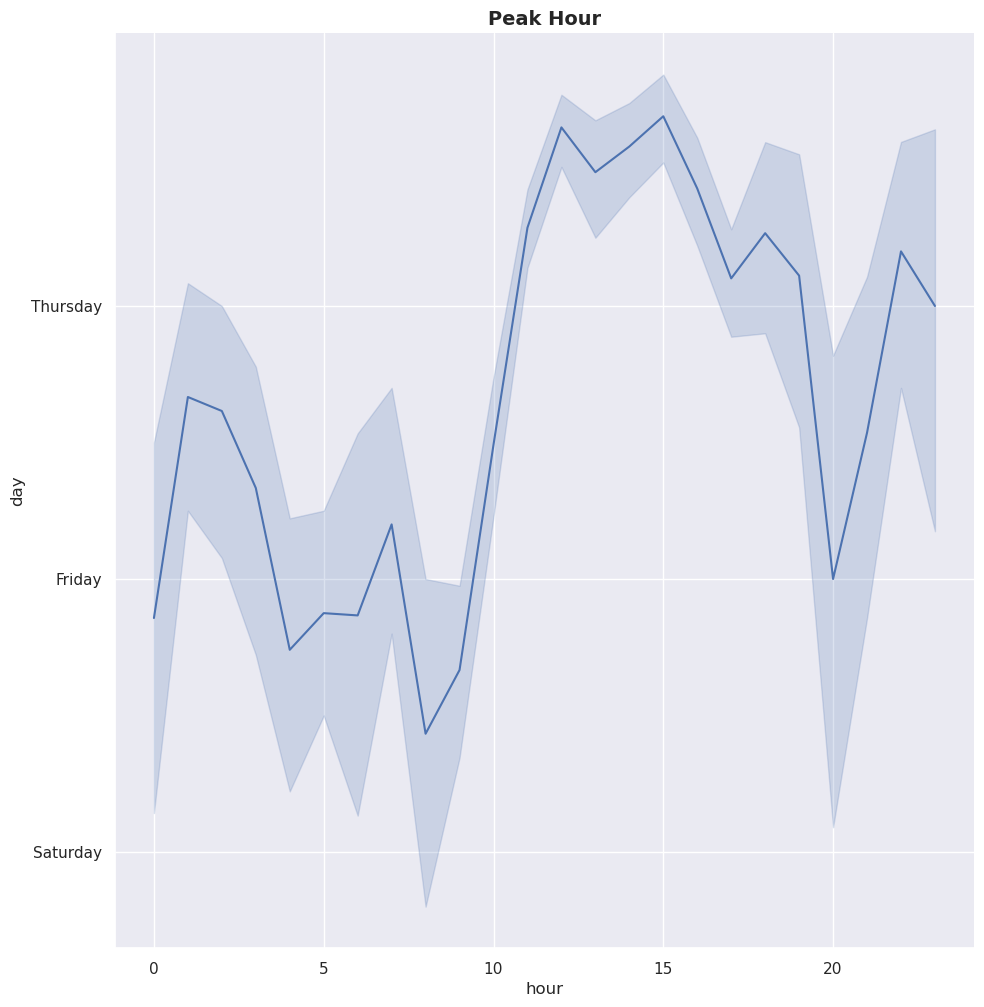

In [60]:
## Peak hour when mostly applications were filled 
sns.relplot(x='hour',y='day',data=df,kind="line",height=10)
plt.title("Peak Hour",fontsize=14, fontweight='bold');

> #### The peak hour is between **10 to 15** where most applications were filled

In [61]:
df.sample()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,day,dayoftheweek,year,hour,Age_category
699,2014-08-28 09:57:02,29,male,United States,SC,No,No,No,Sometimes,6-25,No,Yes,No,No,No,Don't know,Don't know,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,August,Thursday,3,2014,9,adults


In [62]:
## How many males and females or others are self employed
df.groupby("Gender")["self_employed"].value_counts().to_frame()

self_employed
Gender self_employed               
Other  No                        16
       Yes                        6
female No                       225
       Yes                       21
male   No                       872
       Yes                      119

> #### Males about **850+** are not self employed

In [63]:
## Mostly people who are undergoing any treament are of which country
xb=df[df["treatment"]=="Yes"]
x=xb["Country"].value_counts().reset_index()
x

,index,Country
0,United States,410
1,United Kingdom,93
2,Canada,37
3,Germany,21
4,Ireland,13
5,Australia,13
6,Netherlands,9
7,New Zealand,5
8,South Africa,4
9,Poland,4


In [64]:
x["index"].iloc[4:28]=x["index"].iloc[4:28].apply(lambda x:"Others")
x

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,index,Country
0,United States,410
1,United Kingdom,93
2,Canada,37
3,Germany,21
4,Others,13
5,Others,13
6,Others,9
7,Others,5
8,Others,4
9,Others,4


index
United States     410
United Kingdom     93
Others             76
Canada             37
Germany            21
Name: Country, dtype: int64


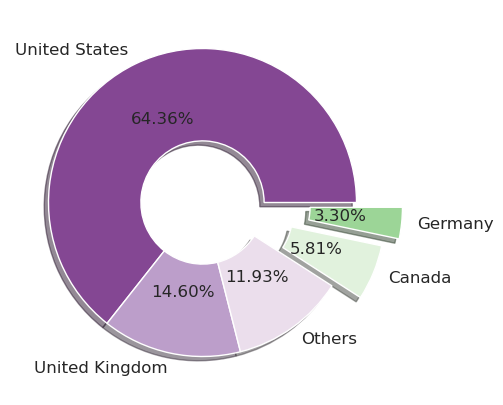

In [65]:
l=x.groupby("index")["Country"].sum().sort_values(ascending=False)
print(l)
plt.figure(figsize=(5,5),dpi=100)
plt.pie(l,labels=l.index,autopct="%0.02f%%",textprops={"fontsize":12},wedgeprops={'width': 0.6},shadow=True,colors=color,explode=[0,0,0,0.2,0.3]);

> #### In United states **above 60%** of the empployee were undergoing treatment for mental illness

In [66]:
df.sample()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,day,dayoftheweek,year,hour,Age_category
36,2014-08-27 11:41:37,29,male,Canada,Others,No,No,No,Rarely,1-5,No,Yes,No,No,No,No,Don't know,Very easy,Yes,Maybe,Some of them,No,No,No,Don't know,No,August,Wednesday,2,2014,11,adults


In [67]:
## People who have family history and undergoing any treament 
y=df[df["family_history"]==df["treatment"]]
ye=y[["family_history","treatment"]].value_counts().reset_index()
ye

,family_history,treatment,0
0,No,No,495
1,Yes,Yes,365


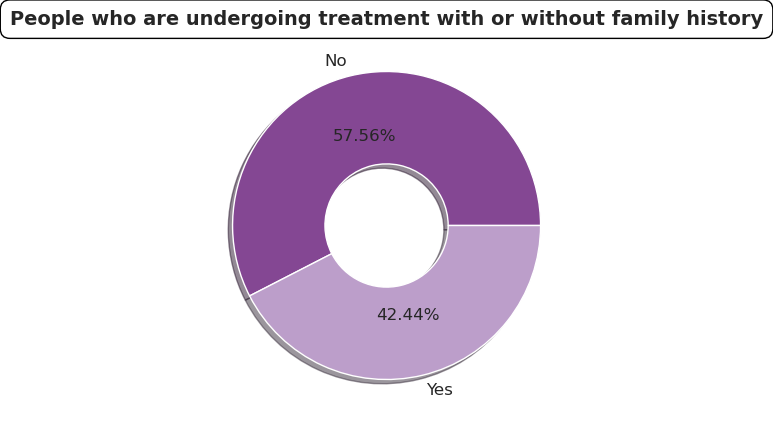

In [68]:
plt.figure(figsize=(5,5),dpi=100)
plt.pie(ye[0],labels=ye["treatment"],autopct="%0.02f%%",textprops={"fontsize":12},wedgeprops={'width': 0.6},shadow=True,colors=color)
plt.title("People who are undergoing treatment with or without family history",fontsize=14, fontweight='bold', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'));

> #### There are **42% people** who are undergoing treamtment with family history of mental illness

Sometimes    362
Often        123
Rarely       122
Never         30
Name: work_interfere, dtype: int64


<AxesSubplot:xlabel='work_interfere', ylabel='count'>

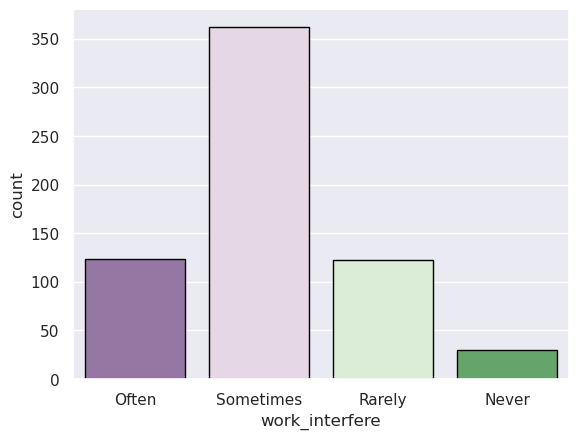

In [69]:
## The people who are undergoing any treatment of a mental health condition, do they feel that it interferes with your work?
print(xb["work_interfere"].value_counts())
sns.countplot(x="work_interfere",data=xb,edgecolor="black",palette='PRGn')

> #### **350+ Employee** think sometimes they feel that it interferes with their work while undergoing treatment

Gender  no_employees  
Other   1-5                 5
        26-100              4
        More than 1000      4
        100-500             3
        6-25                2
female  More than 1000     40
        26-100             38
        100-500            32
        6-25               25
        1-5                21
        500-1000           13
male    26-100            108
        More than 1000    102
        6-25              101
        1-5                65
        100-500            60
        500-1000           14
Name: no_employees, dtype: int64


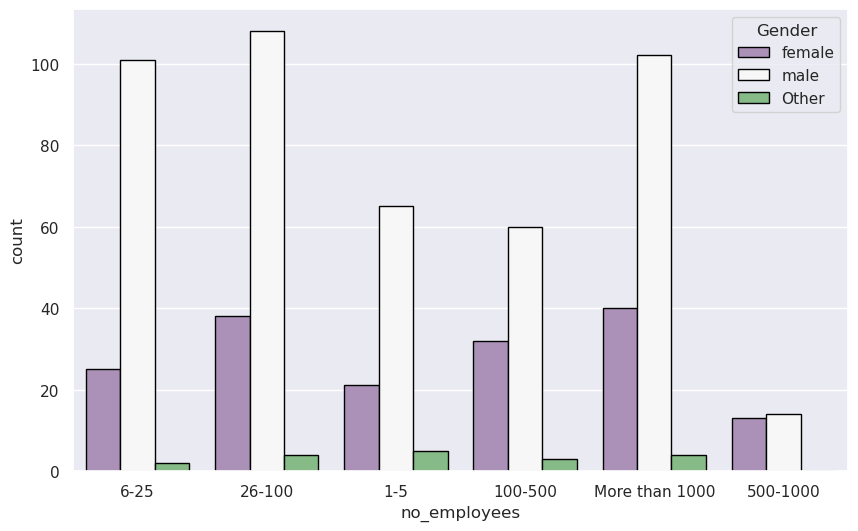

In [70]:
## The people which are under going treatment are of which employee group and what is their gender
print(xb.groupby("Gender")["no_employees"].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x="no_employees",hue="Gender",edgecolor="black",data=xb,palette="PRGn");

> #### Mostly Males, Females and other were from **6 to 25, 26 to 100, more than 1000** employee firm

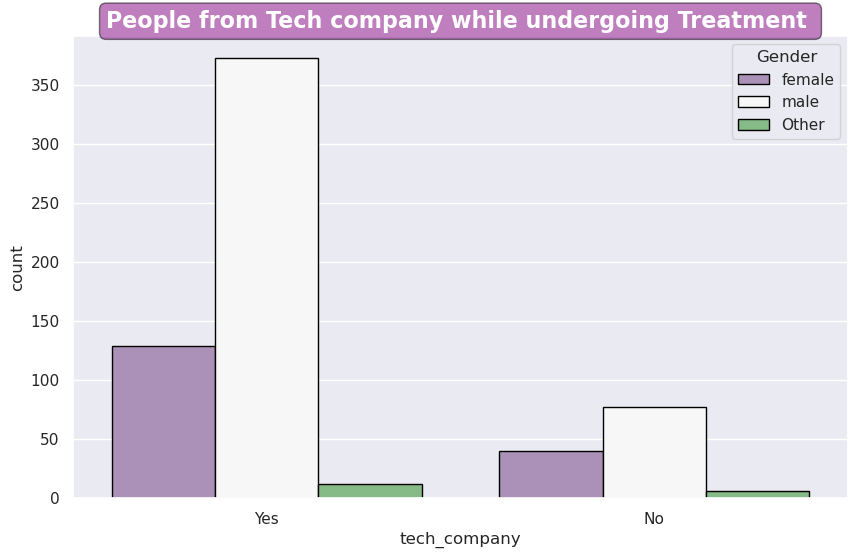

In [71]:
## They people who were undergoing treatment are they from the Tech company and which gender type are they 
plt.figure(figsize=(10,6))
sns.countplot(x="tech_company",hue="Gender",edgecolor="black",data=xb,palette="PRGn")
plt.title('People from Tech company while undergoing Treatment ', fontdict={'fontsize': 16, 'color': 'white', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='purple', alpha=0.5,edgecolor='black'));

> #### **Yes** most of the males, females and others are from the **tech company** who are undergoing treatment

Gender  benefits  
male    Yes           191
        No            148
        Don't know    111
female  Yes           107
        Don't know     35
        No             27
Other   Yes             7
        No              6
        Don't know      5
Name: benefits, dtype: int64


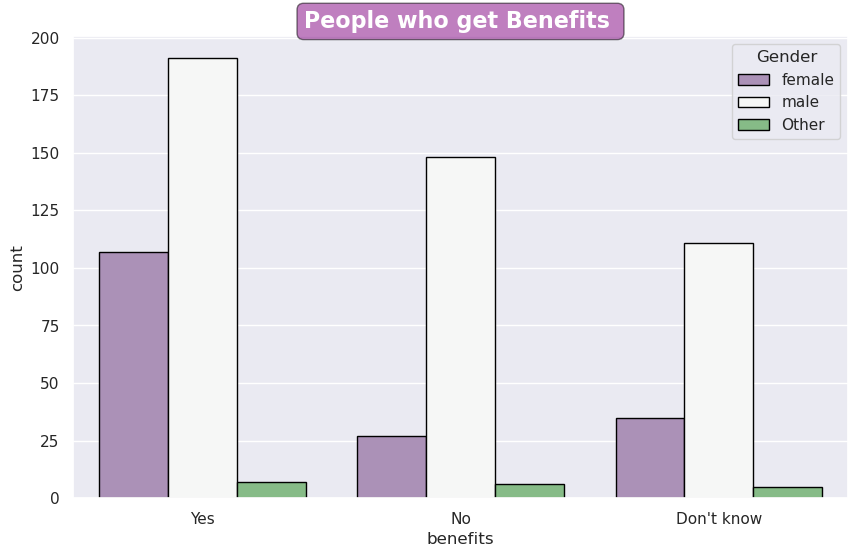

In [72]:
# The people who are undergoing treatment do they think their employer provide mental health benefits?
print(xb.groupby("Gender")["benefits"].value_counts().sort_values(ascending=False))
plt.figure(figsize=(10,6))
sns.countplot(x="benefits",hue="Gender",edgecolor="black",data=xb,palette="PRGn")
plt.title('People who get Benefits ', fontdict={'fontsize': 16, 'color': 'white', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='purple', alpha=0.5,edgecolor='black'));

> #### About **180+ Males and 100+ Females** says yes their employer provide mental health benefits while undergoing treatment 

Gender  leave             
male    Don't know            173
        Somewhat easy          92
        Very easy              77
female  Don't know             76
male    Somewhat difficult     55
        Very difficult         53
female  Somewhat easy          37
        Very easy              23
        Somewhat difficult     21
        Very difficult         12
Other   Somewhat difficult      6
        Don't know              5
        Very easy               3
        Somewhat easy           2
        Very difficult          2
Name: leave, dtype: int64


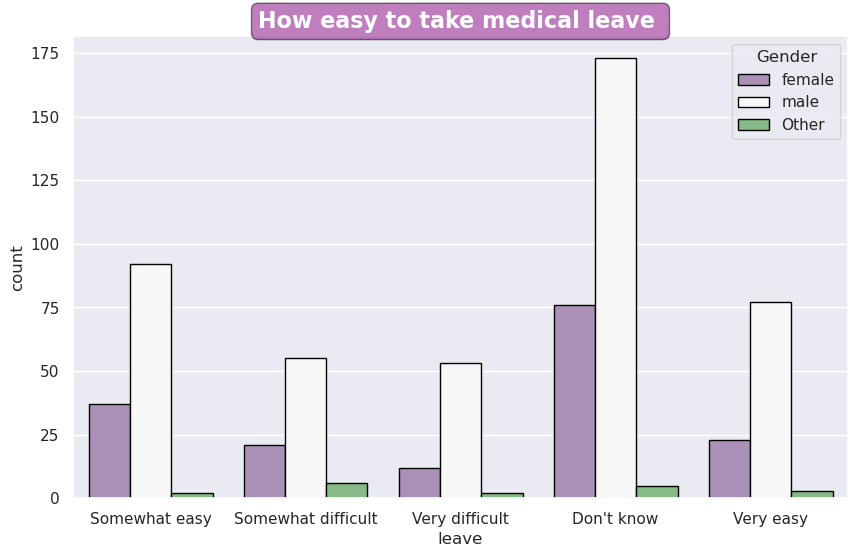

In [73]:
## The people who are undergoing treatment How easy is it for them to take medical leave for a mental health condition?
print(xb.groupby("Gender")["leave"].value_counts().sort_values(ascending=False))
plt.figure(figsize=(10,6))
sns.countplot(x="leave",hue="Gender",edgecolor="black",data=xb,palette="PRGn")
plt.title('How easy to take medical leave ', fontdict={'fontsize': 16, 'color': 'white', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='purple', alpha=0.5,edgecolor='black'));

> #### Mostly people **don't know** if it is easy for them to take medical leave for a mental health condition

Gender  seek_help 
male    No            236
        Don't know    113
        Yes           101
female  No             77
        Don't know     51
        Yes            41
Other   No             10
        Yes             6
        Don't know      2
Name: seek_help, dtype: int64


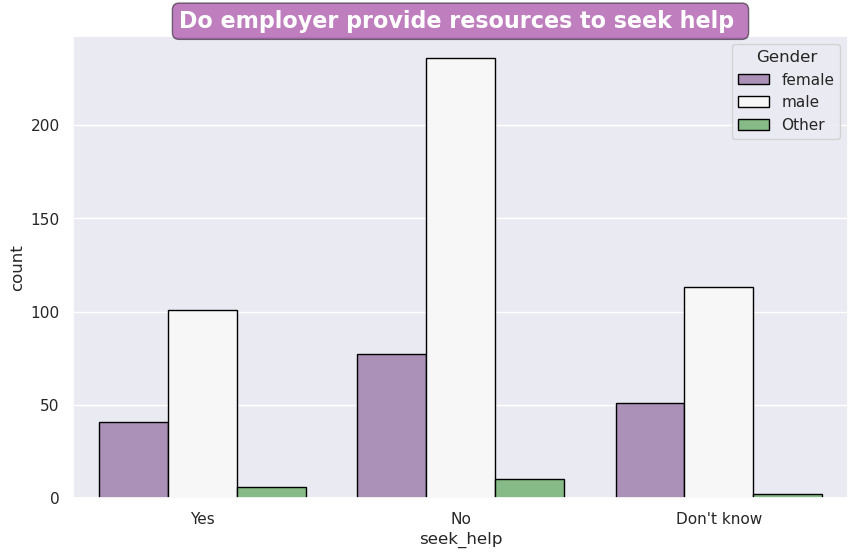

In [74]:
## The people who are undergoing treatment do employer provide resources to learn more about mental health issues and how to seek help?
print(xb.groupby("Gender")["seek_help"].value_counts().sort_values(ascending=False))
plt.figure(figsize=(10,6))
sns.countplot(x="seek_help",hue="Gender",edgecolor="black",data=xb,palette="PRGn")
plt.title('Do employer provide resources to seek help ', fontdict={'fontsize': 16, 'color': 'white', 'fontweight': 'bold'}, bbox=dict(boxstyle='round,pad=0.3', facecolor='purple', alpha=0.5,edgecolor='black'));

> #### Mostly people says **No their employer don't provide** any seek help

In [75]:
df.sample()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,month,day,dayoftheweek,year,hour,Age_category
597,2014-08-27 22:14:46,31,male,United States,NY,No,No,No,Sometimes,26-100,Yes,Yes,Don't know,No,No,Don't know,Don't know,Don't know,Yes,No,No,No,No,Maybe,Don't know,No,August,Wednesday,2,2014,22,adults


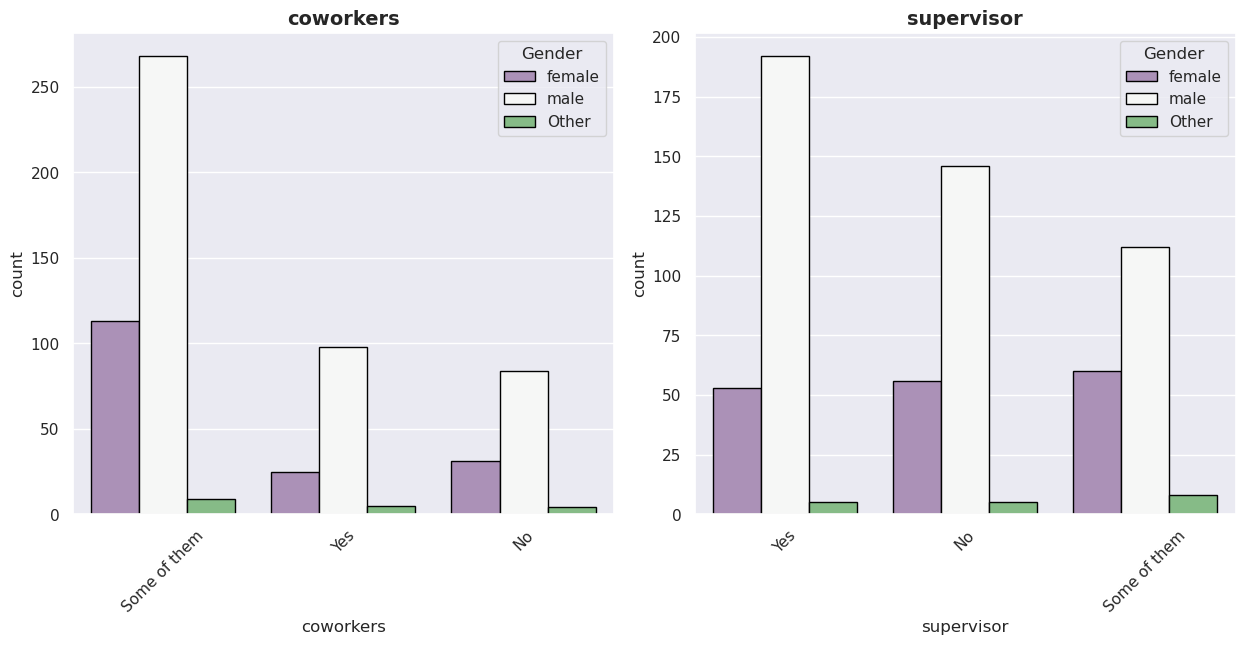

In [76]:
## People who are undergoing treatment Would they be willing to discuss a mental health issue with your direct supervisor(s) or coworkers?
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(x="coworkers",hue="Gender",data=xb,edgecolor="black",palette='PRGn')
plt.xticks(rotation=45)
plt.title("coworkers",fontsize=14, fontweight='bold');
plt.subplots_adjust(wspace=0.15,hspace=0.4);

plt.subplot(2,2,2)
sns.countplot(x="supervisor",hue="Gender",data=xb,edgecolor="black",palette='PRGn')
plt.xticks(rotation=45)
plt.title("supervisor",fontsize=14, fontweight='bold');

Gender  care_options
Other   Yes              10
        Not sure          5
        No                3
female  Yes              89
        No               44
        Not sure         36
male    Yes             208
        No              160
        Not sure         82
Name: care_options, dtype: int64


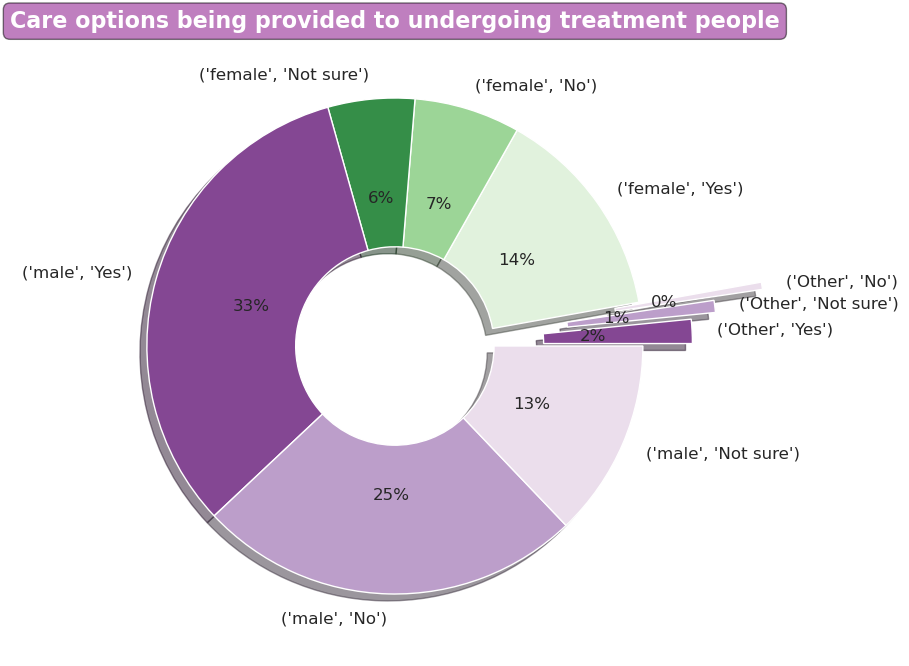

In [77]:
## The people who are undergoing treatment Do options for mental health care your employer provides?
b=xb.groupby("Gender")["care_options"].value_counts()
print(b)
plt.figure(figsize=(8,20),dpi=100)
plt.pie(b,labels=xb.groupby("Gender")["care_options"].value_counts().index,autopct="%0.0f%%",textprops={"fontsize":12},wedgeprops={'width': 0.6},shadow=True,colors=color,explode=[0.20,0.30,0.50,0,0,0,0,0,0])
plt.title('Care options being provided to undergoing treatment people', fontdict={'fontsize': 16, 'color': 'white', 'fontweight': 'bold'}, bbox=dict(boxstyle='round,pad=0.3', facecolor='purple', alpha=0.5,edgecolor='black'));    

> #### **33% of the male** who were undergoing treatment says yes care options being provided to them where as **25% says no**

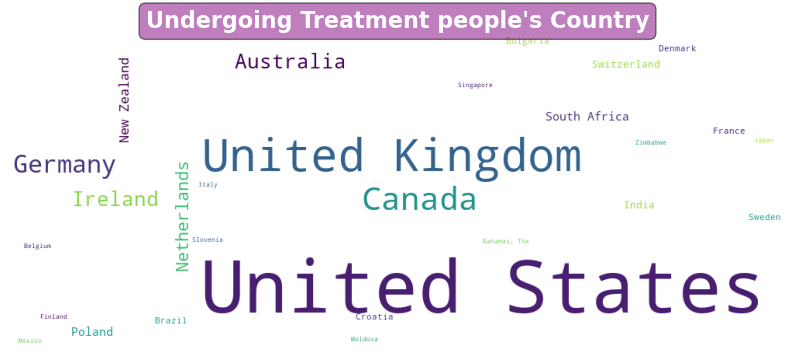

In [78]:
from wordcloud import WordCloud as word
dd=xb["Country"].value_counts()
wc = word(background_color='white', width=1000, height=400)
wc.generate_from_frequencies(dd)
plt.figure(figsize=(10,13),dpi=100)
plt.imshow(wc)
plt.axis('off')
plt.title("Undergoing Treatment people's Country", fontdict={'fontsize': 16, 'color': 'white', 'fontweight': 'bold'}, bbox=dict(boxstyle='round,pad=0.3', facecolor='purple', alpha=0.5,edgecolor='black'));    
plt.show()

> #### Mostly people who are undergoing treatment are from **United states and United Kingdom**

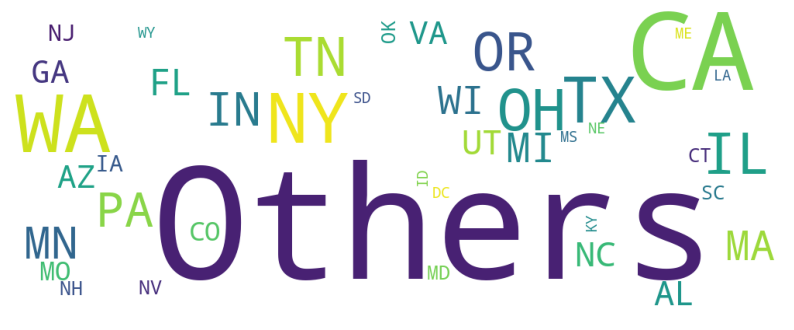

In [79]:
from wordcloud import WordCloud as word
dd=xb["state"].value_counts()
wc = word(background_color='white', width=1000, height=400)
wc.generate_from_frequencies(dd)
plt.figure(figsize=(10,15),dpi=100)
plt.imshow(wc)
plt.axis('off')
plt.show()

> #### Mostly undergoing treatment people are from the **other states and CA **

In [80]:
df.to_csv("Mental health.csv")

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Analysis Finished </h1>


<h3 style="color: red; text-align:center;padding: 10px;font-size: 36px;">If You Like it please do upvote📌 & Comment💬 </h1>
